In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import warnings
import os
warnings.filterwarnings('ignore')

In [18]:
# Replace the placeholders with your MySQL database connection details
conn = mysql.connector.connect(
    host=os.environ.get('HOST'),
    user=os.environ.get('USER'),
    password=os.environ.get('PASSWORD'),
    database=os.environ.get('DATABASE')
)
query = """
        SELECT l.CountryName, COUNT(*) AS TransactionCount
        FROM transactions t
        JOIN locations l ON t.OriginAirportCode = l.AirportCode
        GROUP BY l.CountryName
        ORDER BY TransactionCount DESC;"""
query2 = """
        SELECT 
            CASE 
                WHEN l1.CountryName = l2.CountryName THEN 'Domestic'
                ELSE 'International'
            END AS TransactionType,
            COUNT(*) AS TransactionCount
        FROM transactions t
        LEFT JOIN locations l1 ON t.OriginAirportCode = l1.AirportCode
        LEFT JOIN locations l2 ON t.DestinationAirportCode = l2.AirportCode
        GROUP BY TransactionType;"""
visited_country = pd.read_sql(query, conn)
dom_int = pd.read_sql(query2, conn)
conn.close()

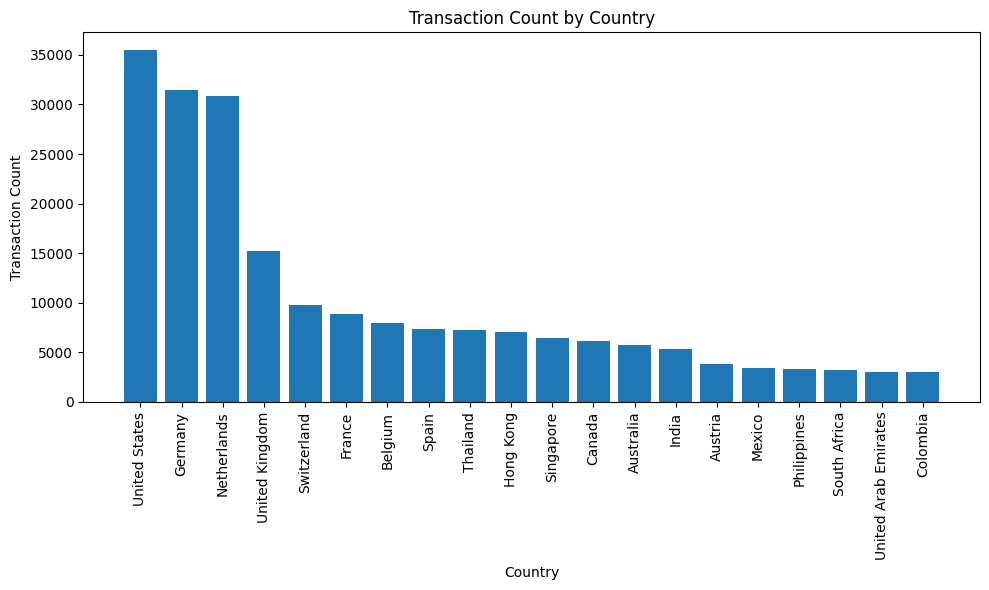

In [19]:
visited_country = visited_country.head(20)
country_counts = visited_country['CountryName']
transaction_counts = visited_country['TransactionCount']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(country_counts, transaction_counts)
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the spacing
plt.show()

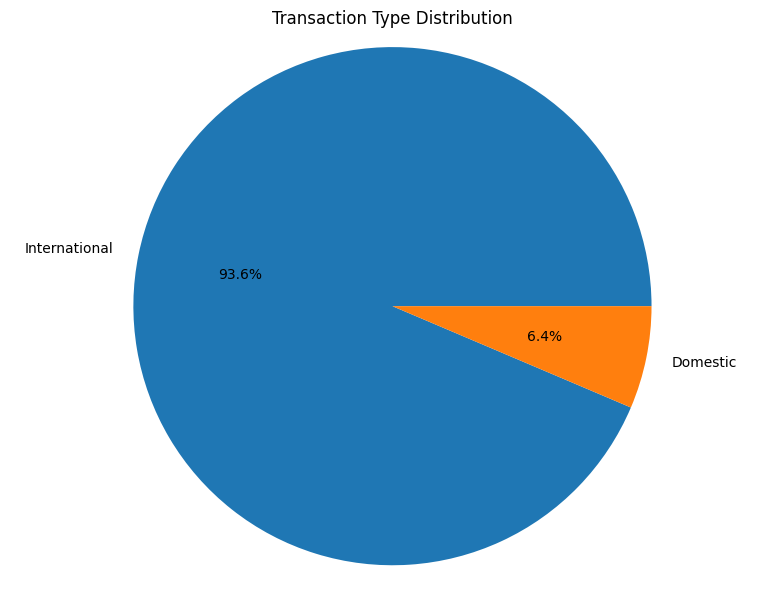

In [20]:
# Assuming your DataFrame is named "df"
transaction_types = dom_int['TransactionType']
transaction_counts = dom_int['TransactionCount']

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.pie(transaction_counts, labels=transaction_types, autopct='%1.1f%%')
plt.title('Transaction Type Distribution')
plt.axis('equal')  # Ensures that the pie is drawn as a circle
plt.tight_layout()  # Adjust the spacing
plt.show()